In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime



In [2]:
solar_sales = pd.read_excel('sunsales_2014_2018.xls', sheet_name='Sheet1')

In [3]:
solar_sales.head(3)

,Quote Number,End Customer,Product Hierarchy,Product Family,Geographic Region,Sold-to party,Distributor,Part Number,Quarter of Year,Month of Year,Net Inv QTY,Net Inv-$
0,405011005,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,20174,Period 11 2017,10.0,110.6
1,405011005,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,20174,Period 12 2017,10.0,110.6
2,405011005,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,20181,Period 01 2018,10.0,110.6


#### CLEANING UP THE DATA

In [4]:
# CHECKING THE COLUMN NAMES
solar_sales.columns

Index(['Quote Number', 'End Customer', 'Product Hierarchy', 'Product Family',
       'Geographic Region', 'Sold-to party', 'Distributor', 'Part Number',
       'Quarter of Year', 'Month of Year', 'Net Inv QTY', 'Net Inv-$'],
      dtype='object')

In [5]:
# CHOOSING RELEVANT COLUMNS

solsales = solar_sales.loc[:,['End Customer', 'Product Hierarchy', 'Product Family',
       'Geographic Region', 'Sold-to party', 'Distributor', 'Part Number',
       'Quarter of Year', 'Month of Year', 'Net Inv QTY', 'Net Inv-$']]


In [6]:
# REFORMATING COLUMNS AND INSERTING NEW COLUMNS

solsales.insert(loc=8, column='Month2', value = solsales['Month of Year'].str[7:].str.replace(' ','-'))

In [7]:
# REFORMATING COLUMNS AND INSERTING NEW COLUMNS

solsales.insert(loc=8, column='Quarter', value = 'Q'+ solsales['Quarter of Year'].astype(str).str[4])

In [8]:
# REFORMATING COLUMNS,INSERTING NEW COLUMNS AND DROPPING OTHERS

solsales.insert(loc=8, column='Month', value = solsales['Month2'])
solsales.drop(['Quarter of Year','Month of Year', 'month', 'Month2'], axis=1, errors='ignore', inplace = True)


In [9]:
# Transforming month into datetime format
solsales['Month'] = pd.to_datetime(solsales['Month'], format='%m-%Y')


In [10]:
# REFORMATING COLUMNS,INSERTING MONTH AND YEAR

solsales.insert(loc=8, column='Year', value = solsales['Month'].dt.year)
solsales.insert(loc=8, column='Month2', value = solsales['Month'].dt.month)

In [11]:
solsales.drop(['Month'], axis=1, errors='ignore', inplace = True)

In [12]:
solsales.rename(columns={'Month2': 'Month'}, inplace= True)

In [13]:
solsales.head(2)

,End Customer,Product Hierarchy,Product Family,Geographic Region,Sold-to party,Distributor,Part Number,Month,Year,Quarter,Net Inv QTY,Net Inv-$
0,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,11,2017,Q4,10.0,110.6
1,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,12,2017,Q4,10.0,110.6


In [14]:
# CHECKING THE DIFFERENT COLUMN ENTRIES. 
solsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25511 entries, 0 to 25510
Data columns (total 12 columns):
End Customer         25511 non-null object
Product Hierarchy    25511 non-null object
Product Family       25511 non-null object
Geographic Region    25511 non-null object
Sold-to party        25511 non-null int64
Distributor          25511 non-null object
Part Number          25511 non-null object
Month                25511 non-null int64
Year                 25511 non-null int64
Quarter              25511 non-null object
Net Inv QTY          22087 non-null float64
Net Inv-$            25511 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.3+ MB


In [15]:
solsales['Net Inv QTY'].value_counts(dropna = False).head()

 10.0     4587
NaN       3424
 20.0     2118
 100.0    1617
 30.0     1052
Name: Net Inv QTY, dtype: int64

#### ** FROM THE RESULT ABOVE IT INDICATES THERE ARE 3424 NAN VALUES IN THE QTY COLUMN **

In [16]:
solsales[solsales['Net Inv QTY'].isnull()].head(3)

,End Customer,Product Hierarchy,Product Family,Geographic Region,Sold-to party,Distributor,Part Number,Month,Year,Quarter,Net Inv QTY,Net Inv-$
909,*BENCHMARK ELECTROMECHANICAL 2019,PPF650NA09 ZZ,Midgit KLKD,US/CAN,306110,ARROW PEMCO GROUP,KLKD020.T,4,2015,Q2,NaN,-4270.74
910,*SANMINA/ARROW YRLY 2013,PPF650NA09 ZZ,Midgit KLKD,US/CAN,306110,ARROW PEMCO GROUP,KLKD030.T,1,2014,Q1,NaN,-25086.51
911,*SANMINA/ARROW YRLY 2014,PPF650NA09 ZZ,Midgit KLKD,US/CAN,306110,ARROW PEMCO GROUP,KLKD030.T,3,2014,Q1,NaN,-2387.86


** The NaN value fields all have corresponding negative sales dollars. This is due to ship and debit process with Distributors. We can safely delete all records with these NaN values as they are not relevant to our analysis **

In [17]:
# Checking that all the NaN records have been dropped.
slr_sls = solsales.dropna()

slr_sls.info()

slr_sls['Net Inv QTY'].value_counts(dropna = False).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22087 entries, 0 to 25510
Data columns (total 12 columns):
End Customer         22087 non-null object
Product Hierarchy    22087 non-null object
Product Family       22087 non-null object
Geographic Region    22087 non-null object
Sold-to party        22087 non-null int64
Distributor          22087 non-null object
Part Number          22087 non-null object
Month                22087 non-null int64
Year                 22087 non-null int64
Quarter              22087 non-null object
Net Inv QTY          22087 non-null float64
Net Inv-$            22087 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


10.0     4587
20.0     2118
100.0    1617
30.0     1052
50.0      949
Name: Net Inv QTY, dtype: int64

#### Visual Analysis

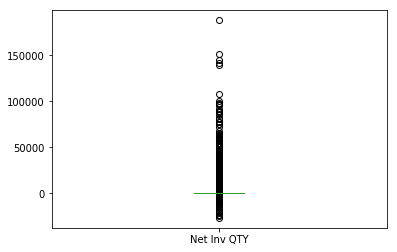

In [18]:
# Checking for any outliers
slr_sls.plot(y='Net Inv QTY',kind = 'box'); plt.show()

In [19]:
# Checking for any duplicates
slrsls_noduplicates = slr_sls.drop_duplicates()
slrsls_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22087 entries, 0 to 25510
Data columns (total 12 columns):
End Customer         22087 non-null object
Product Hierarchy    22087 non-null object
Product Family       22087 non-null object
Geographic Region    22087 non-null object
Sold-to party        22087 non-null int64
Distributor          22087 non-null object
Part Number          22087 non-null object
Month                22087 non-null int64
Year                 22087 non-null int64
Quarter              22087 non-null object
Net Inv QTY          22087 non-null float64
Net Inv-$            22087 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [20]:
slrsls=slrsls_noduplicates
slrsls.head(3)

,End Customer,Product Hierarchy,Product Family,Geographic Region,Sold-to party,Distributor,Part Number,Month,Year,Quarter,Net Inv QTY,Net Inv-$
0,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,11,2017,Q4,10.0,110.6
1,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,12,2017,Q4,10.0,110.6
2,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,1,2018,Q1,10.0,110.6


In [21]:
# Introducing average selling price (ASP) per SKU
slrsls['ASP-$']=slrsls['Net Inv-$']/slrsls['Net Inv QTY']


In [22]:
slrsls.head(3)

,End Customer,Product Hierarchy,Product Family,Geographic Region,Sold-to party,Distributor,Part Number,Month,Year,Quarter,Net Inv QTY,Net Inv-$,ASP-$
0,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,11,2017,Q4,10.0,110.6,11.06
1,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,12,2017,Q4,10.0,110.6,11.06
2,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,1,2018,Q1,10.0,110.6,11.06


In [23]:
slrsls['Geographic Region'].unique()

array(['ASIA', 'EMEA', 'US/CAN', 'LATAM'], dtype=object)

In [24]:
solar_sales.head(3)

,Quote Number,End Customer,Product Hierarchy,Product Family,Geographic Region,Sold-to party,Distributor,Part Number,Quarter of Year,Month of Year,Net Inv QTY,Net Inv-$
0,405011005,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,20174,Period 11 2017,10.0,110.6
1,405011005,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,20174,Period 12 2017,10.0,110.6
2,405011005,TTI ELECTRONICS ASIA PTE LTD.,PPF650NA09 ZZ,Midgit KLKD,ASIA,405011,TTI ELECTRONICS ASIA PTE LTD,KLKD.500T,20181,Period 01 2018,10.0,110.6


In [25]:
ss_monthly = solar_sales.loc[:,['End Customer', 'Product Family',
       'Geographic Region', 'Distributor', 'Part Number',
       'Quarter of Year', 'Month of Year', 'Net Inv QTY', 'Net Inv-$']]

ss_monthly.insert(loc=6, column='Month2', value = ss_monthly['Month of Year'].str[7:].str.replace(' ','-'))
ss_monthly['Month'] = pd.to_datetime(ss_monthly['Month2'], format='%m-%Y')
ss_monthly.insert(loc=6, column='Quarter', value = 'Q'+ ss_monthly['Quarter of Year'].astype(str).str[4])
ss_monthly.drop(['Quarter of Year','Month of Year', 'Month2'], axis=1, errors='ignore', inplace = True)
ss_monthly.rename(columns={'Month': 'Date'}, inplace= True)
ss_monthly = ss_monthly.dropna()

In [26]:
ss_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22087 entries, 0 to 25510
Data columns (total 9 columns):
End Customer         22087 non-null object
Product Family       22087 non-null object
Geographic Region    22087 non-null object
Distributor          22087 non-null object
Part Number          22087 non-null object
Quarter              22087 non-null object
Net Inv QTY          22087 non-null float64
Net Inv-$            22087 non-null float64
Date                 22087 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.7+ MB


In [27]:
ss_sls = ss_monthly.set_index('Date').sort_index()

In [28]:
ss_sls['2014-01':'2014-12'].head(2)


,End Customer,Product Family,Geographic Region,Distributor,Part Number,Quarter,Net Inv QTY,Net Inv-$
Date,,,,,,,,
2014-01-01,VAN METER INDUSTRIAL,LPHV and LFPHV FHolder,US/CAN,VAN METER INDUSTRIAL,LFPHV0001ZXID,Q1,24.0,380.40
2014-01-01,ELETTRO ITALIA SRL,Midgit SPF,EMEA,ELETTRO ITALIA SRL,0SPF012.T,Q1,70.0,75.42


In [29]:
ss_sls['2014Q1'].tail(3)

,End Customer,Product Family,Geographic Region,Distributor,Part Number,Quarter,Net Inv QTY,Net Inv-$
Date,,,,,,,,
2014-03-01,PLATT ELECTRIC SUPPLY-HUB,Midgit KLKD,US/CAN,PLATT ELECTRIC SUPPLY-HUB,KLKD002.T,Q1,10.0,81.0
2014-03-01,LE CHAMP (SEA) PTE LTD,Midgit KLKD,ASIA,LE CHAMP (SEA) PTE LTD,KLKD025.HXR,Q1,5.0,0.0
2014-03-01,MAYER ELECTRIC-EAST-NORCROSS HUB,Midgit KLKD,US/CAN,MAYER ELECTRIC-EAST-NORCROSS HUB,KLKD008.T,Q1,20.0,121.5


### 1. Can you count something interesting

In [30]:
# Counting the total number of SKUs and determining the most sold SKU by year.

print('There are',len(ss_sls['Part Number'].unique()), 'part numbers sold')


# Determine the highest sold SKU per year

print('\n************************************* Most sold SKU by year *****************************************\n')


pnum_high = slr_sls.pivot_table(index='Year', columns='Part Number', values='Net Inv QTY', aggfunc='sum')
pnum_dollars = slr_sls.pivot_table(index='Year', columns='Part Number', values='Net Inv-$', aggfunc='sum')

# Function to select the highest selling SKU

def highestsold(dframe):
    part_num = []
    for i in dframe.index:
        temp_dict = {}
        maxval = 0
        for j in dframe.columns:
                if dframe[j][i] > maxval:
                    maxval = dframe[j][i]
                    temp_dict[i] = (j, maxval)
        part_num.append(temp_dict)
    return part_num


pnum=highestsold(pnum_high)
pnumdols=highestsold(pnum_dollars)
            
for u in pnum:
    for i, j in u.items():
        a, b = j
        print('In ',i, 'the highest selling part number was',a,'and it sold',b,'units')


    
print('\n************************************* Highest grossing SKU by year *****************************************\n')

    
for u in pnumdols:
    for i, j in u.items():
        a, b = j
        print('In ',i, 'the highest grossing part number was',a,'and it sold $',round(b,2))   
    

There are 317 part numbers sold

************************************* Most sold SKU by year *****************************************

In  2014 the highest selling part number was 0SPF015.T and it sold 721113.0 units
In  2015 the highest selling part number was 0SPF015.T and it sold 988279.0 units
In  2016 the highest selling part number was 0SPF015.T and it sold 915765.0 units
In  2017 the highest selling part number was 0SPF015.T and it sold 912861.0 units
In  2018 the highest selling part number was 0SPF015.T and it sold 938301.0 units

************************************* Highest grossing SKU by year *****************************************

In  2014 the highest grossing part number was KLKD030.T and it sold $ 1129823.29
In  2015 the highest grossing part number was SPXI004.L and it sold $ 2019981.4
In  2016 the highest grossing part number was KLKD030.T and it sold $ 873808.32
In  2017 the highest grossing part number was KLKD030.T and it sold $ 873379.94
In  2018 the highest g

#### 2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

**SKU Analysis and Trends:**

Though the same part number sold the highest number of units for all five years, it did not feature as the top grossing part number in any of the five years implying its price is relatively lower than the top grossing part numbers

**Regional Trends From the bar plot below**

Overall 2015 was one of the best years for all the regions and 2016 was a tough year for 
North America and Asia have been the strongest markets while EMEA is seeing a steady decline since 2015. The Asia market has been growing steadily and is on track to be about par with the NA market.

#### 3. Can you make a bar plot or a histogram?



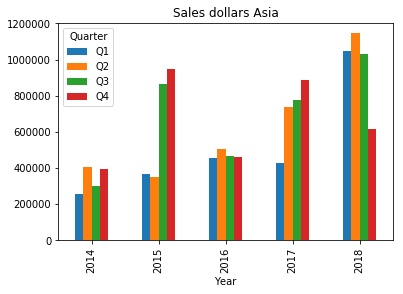

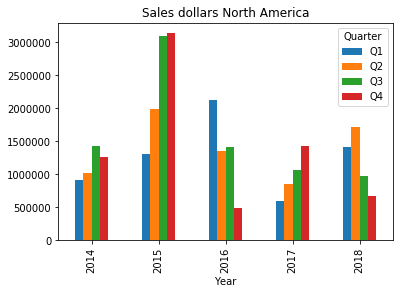

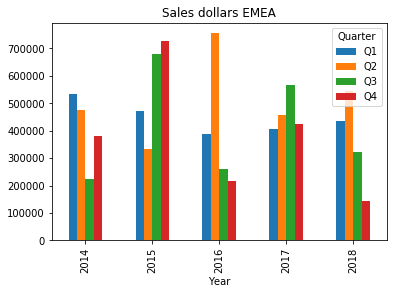

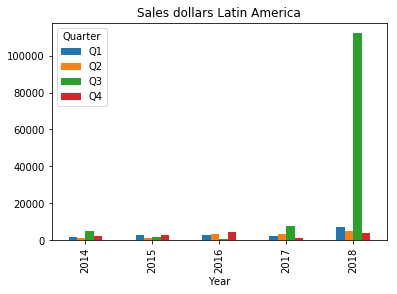

In [31]:
# VISUALIZING THE TOTAL SALES $$ BY QUARTER BY REGION

# plt.subplot(2,2,1)
slrsls_asia = slrsls[slrsls['Geographic Region']== 'ASIA'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_asia['Net Inv-$'].unstack().plot(kind='bar', title = 'Sales dollars Asia')
plt.show()

# plt.subplot(2,2,2)
slrsls_NA = slrsls[slrsls['Geographic Region']== 'US/CAN'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_NA['Net Inv-$'].unstack().plot(kind='bar',title = 'Sales dollars North America')
plt.show()

# plt.subplot(2,2,3)
slrsls_NA = slrsls[slrsls['Geographic Region']== 'EMEA'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_NA['Net Inv-$'].unstack().plot(kind='bar',title = 'Sales dollars EMEA')
plt.show()

# plt.subplot(2,2,4)
slrsls_NA = slrsls[slrsls['Geographic Region']== 'LATAM'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_NA['Net Inv-$'].unstack().plot(kind='bar',title = 'Sales dollars Latin America')
plt.show()

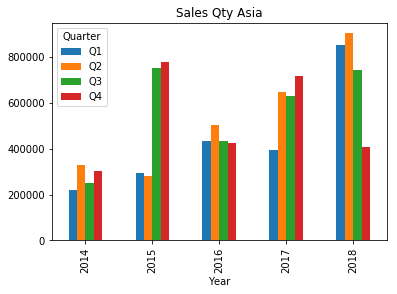

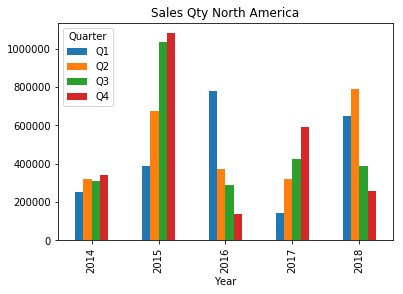

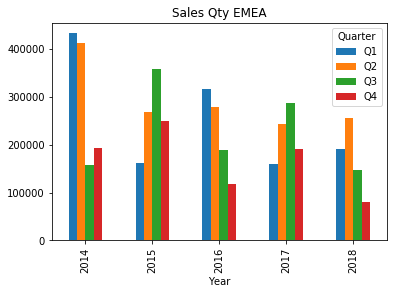

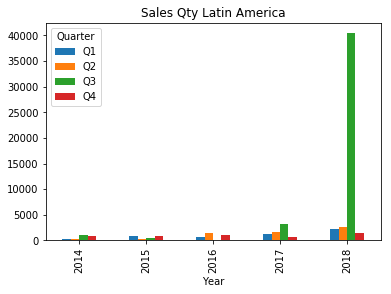

In [32]:
# VISUALIZING THE TOTAL NUMBER OF SKUs SOLD BY QUARTER BY REGION

# plt.subplot(2,2,1)
slrsls_asia = slrsls[slrsls['Geographic Region']== 'ASIA'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_asia['Net Inv QTY'].unstack().plot(kind='bar', title = 'Sales Qty Asia')
plt.show()

# plt.subplot(2,2,2)
slrsls_NA = slrsls[slrsls['Geographic Region']== 'US/CAN'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_NA['Net Inv QTY'].unstack().plot(kind='bar',title = 'Sales Qty North America')
plt.show()

# plt.subplot(2,2,3)
slrsls_NA = slrsls[slrsls['Geographic Region']== 'EMEA'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_NA['Net Inv QTY'].unstack().plot(kind='bar',title = 'Sales Qty EMEA')
plt.show()

# plt.subplot(2,2,4)
slrsls_NA = slrsls[slrsls['Geographic Region']== 'LATAM'].groupby(['Year','Quarter'])['Net Inv QTY', 'Net Inv-$'].agg({'Net Inv QTY':'sum', 'Net Inv-$':'sum'}).head(20)
slrsls_NA['Net Inv QTY'].unstack().plot(kind='bar',title = 'Sales Qty Latin America')
plt.show()

#### 4. Can you compare two related quantities?

Comparing the average selling price by Product Family over 5 years.

In [33]:
# Determine if there are any columns with zeros Qty or zero dollars.
slrsls.info()
slrsls[(slrsls[['Net Inv QTY','Net Inv-$']]==0).any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22087 entries, 0 to 25510
Data columns (total 13 columns):
End Customer         22087 non-null object
Product Hierarchy    22087 non-null object
Product Family       22087 non-null object
Geographic Region    22087 non-null object
Sold-to party        22087 non-null int64
Distributor          22087 non-null object
Part Number          22087 non-null object
Month                22087 non-null int64
Year                 22087 non-null int64
Quarter              22087 non-null object
Net Inv QTY          22087 non-null float64
Net Inv-$            22087 non-null float64
ASP-$                22087 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 452 to 25510
Data columns (total 13 columns):
End Customer         1620 non-null object
Product Hierarchy    1620 non-null object
Product Family       1620 non-null object
Geographic Region    1620 non-null

In [34]:
# Selecting on the the non-zero rows
slrprice = slrsls[(slrsls['Net Inv QTY']!=0) & (slrsls['Net Inv-$']!=0)]
slrprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 25491
Data columns (total 13 columns):
End Customer         20467 non-null object
Product Hierarchy    20467 non-null object
Product Family       20467 non-null object
Geographic Region    20467 non-null object
Sold-to party        20467 non-null int64
Distributor          20467 non-null object
Part Number          20467 non-null object
Month                20467 non-null int64
Year                 20467 non-null int64
Quarter              20467 non-null object
Net Inv QTY          20467 non-null float64
Net Inv-$            20467 non-null float64
ASP-$                20467 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.2+ MB


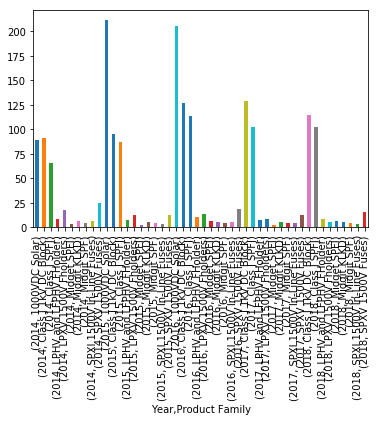

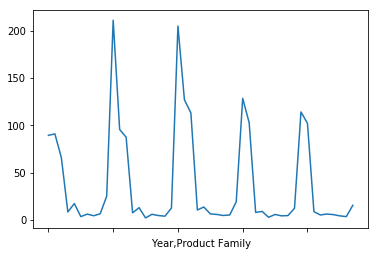

In [35]:
# Plotting the average selling price of product families over 5 years.

slrprice.groupby(['Year','Product Family'])['ASP-$'].mean().plot(kind='bar')
plt.show()

slrprice.groupby(['Year','Product Family'])['ASP-$'].mean().plot()
plt.show()

#### 5. Can you make a scatterplot?

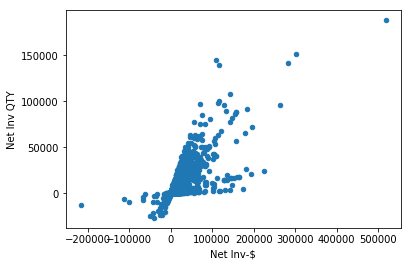

In [36]:
# Scatter Plot of Qty vs Dollars
slrprice.plot(kind='scatter', x='Net Inv-$', y='Net Inv QTY')
plt.show()

#### 6. Can you make a time-series plot?
Time plot of Sales Qty vs Dollars over a period of 5 years

In [37]:
ss_totglob = ss_sls.groupby('Date')['Net Inv QTY', 'Net Inv-$'].sum()

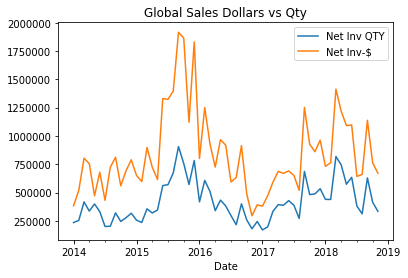

In [38]:

ss_totglob['2014':'2018'].plot(title='Global Sales Dollars vs Qty'); plt.show()

